# Pharmacodynamics
## AbsHill model

In [194]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import fsolve, bisect

In [195]:
def Hill(x, n = 1):
    return x**n / (1 + x**n)

def AbsHill(x, n = 1):
    return x**n / (1 + np.abs(x)**n)

In [196]:
def compute_isobole(f, x1_list):
    x2_list = []
    for x1 in x1_list:
        x2, _, result, _ = fsolve(lambda x2: f(x1, x2) - 0.5, 1, full_output=True)
        
        if result == 1 and x2 >= 0:
            x2_list.append(x2[0])
        else:
            x2_list.append(np.nan)

    return np.array(x2_list)

In [197]:
log_x_list = np.logspace(-1, 1, 101)
x_list = np.linspace(0, 10, 101)

f_1 = lambda x: Hill(x)
f_2 = lambda x: -Hill(x/2)
f_sum_ref = lambda x1, x2: AbsHill(x1 - x2/2)
sum_ref = f_sum_ref(log_x_list, log_x_list)
isobole_ref = compute_isobole(f_sum_ref, x_list)


def plot_effect_and_isobole(f_1, f_2, f_sum):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.45))
    ax1.semilogx(log_x_list, f_1(log_x_list), label='X1')
    ax1.semilogx(log_x_list, f_2(log_x_list), label='-X2')
    ax1.semilogx(log_x_list, sum_ref, c='k', ls='--', label='X1-X2 (subtractive)')
    ax1.semilogx(log_x_list, f_sum(log_x_list, log_x_list), c='k', lw=3, label='X1-X2')
    ax1.set_xlabel('Concentration')
    ax1.set_ylabel('Effect')
    ax1.set_ylim([-1, 1])
    ax1.legend()

    X1, X2 = np.meshgrid(x_list, x_list)
    ax2.contour(X1, X2, f_sum(X1, X2), list(np.arange(-0.9, 1, 0.1)), colors='tab:grey', linestyles='dotted', linewidths=1)
    ax2.contour(X1, X2, f_sum(X1, X2), [-0.5, 0], colors='tab:grey', linewidths=1)
    IB = ax2.contour(X1, X2, f_sum(X1, X2), [0.5], linewidths=3)
    IB_ref = ax2.plot(x_list, isobole_ref, c='k', ls='--')
    ax2.legend(IB_ref + IB.legend_elements()[0], ['EC50 (subtractive)', 'EC50'])
    ax2.set_xlabel('[X1]')
    ax2.set_ylabel('[X2]')
    ax2.set_xlim([0, 4])
    ax2.set_ylim([0, 4])
    

### Subtraction

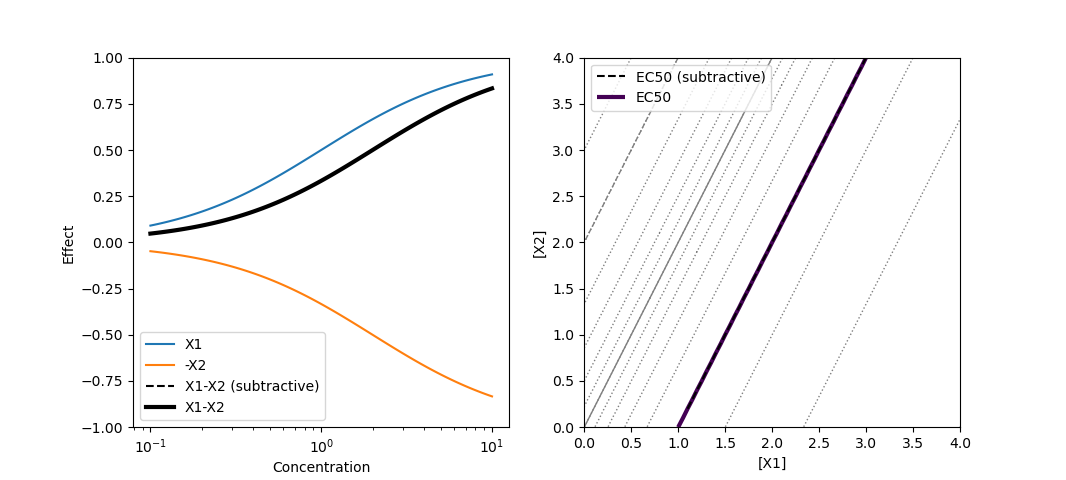

In [198]:
f_sum = lambda x1, x2: AbsHill(x1 - x2/2)
plot_effect_and_isobole(f_1, f_2, f_sum)

### Antagonism

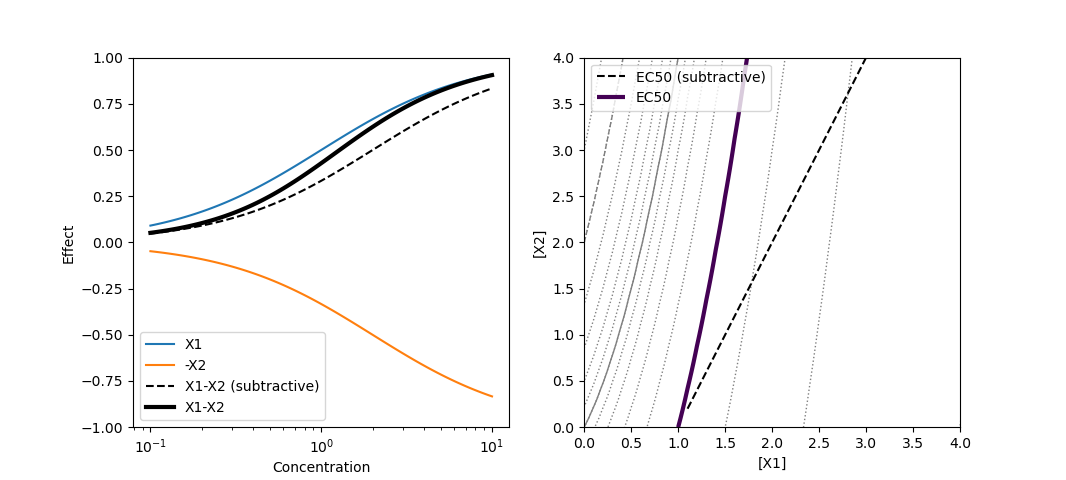

In [199]:
f_sum = lambda x1, x2: AbsHill(x1 - x2/2/(1 + x1))
plot_effect_and_isobole(f_1, f_2, f_sum)

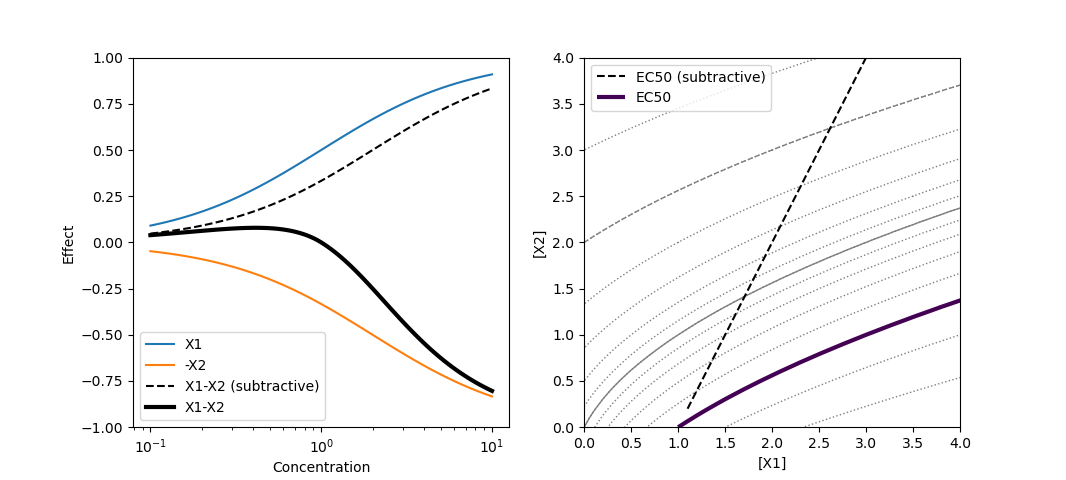

In [200]:
f_sum = lambda x1, x2: AbsHill(x1/(1 + x2) - x2/2)
plot_effect_and_isobole(f_1, f_2, f_sum)

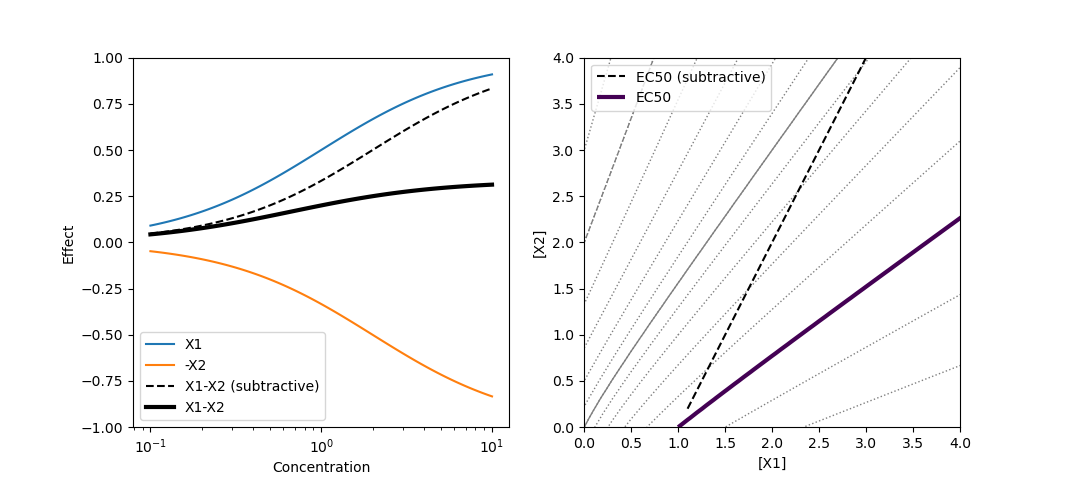

In [201]:
f_sum = lambda x1, x2: AbsHill(x1/(1 + x2) - x2/2/(1 + x1))
plot_effect_and_isobole(f_1, f_2, f_sum)

### Synergism

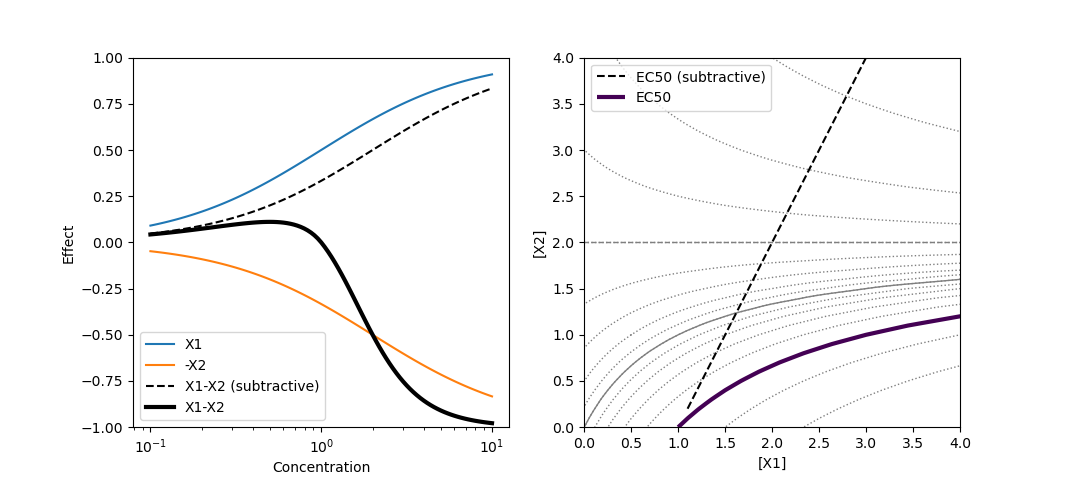

In [202]:
f_sum = lambda x1, x2: AbsHill(x1 - x2/2*(1 + x1))
plot_effect_and_isobole(f_1, f_2, f_sum)

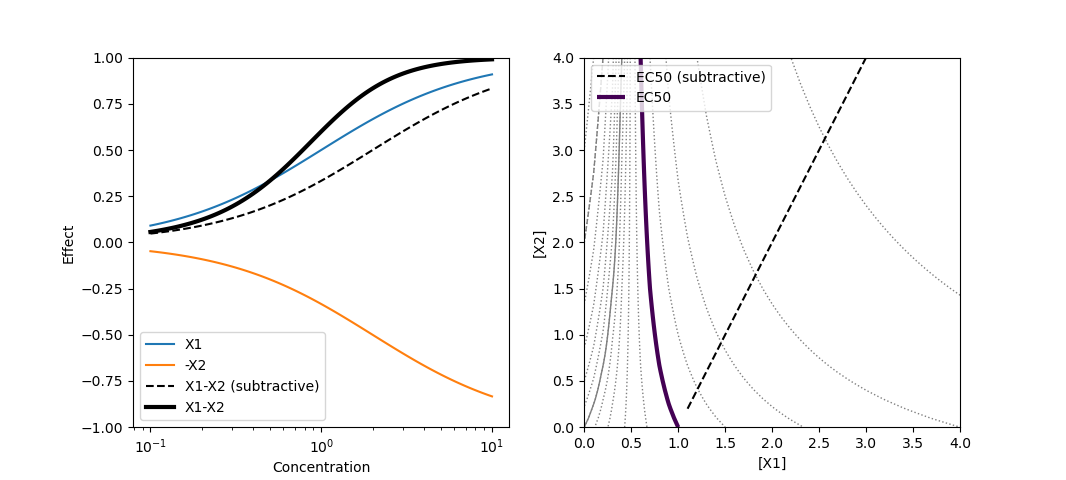

In [203]:
f_sum = lambda x1, x2: AbsHill(x1*(1 + x2) - x2/2)
plot_effect_and_isobole(f_1, f_2, f_sum)

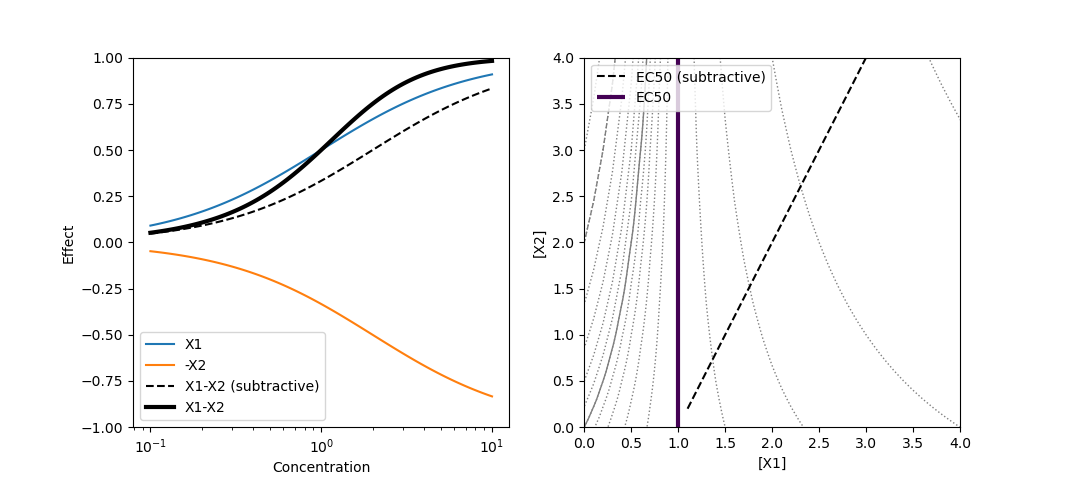

In [204]:
f_sum = lambda x1, x2: AbsHill(x1*(1 + x2) - x2/2*(1 + x1))
plot_effect_and_isobole(f_1, f_2, f_sum)

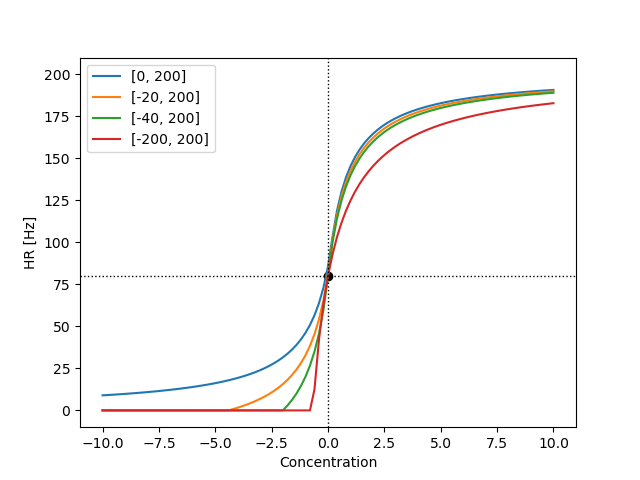

In [211]:
def KexHill(x, m, b, x_0, y_min, y_max):
    y = m * AbsHill(x - x_0) + b

    if hasattr(x, '__iter__'):
        y[y<y_min] = y_min
        y[y>y_max] = y_max
    elif y < y_min:
        return y_min
    elif y > y_max:
        return y_max
    return y

def get_kex_hill(y_min, y_min_cut, y_0, y_max_cut, y_max):
    m = (y_max - y_min) / 2
    b = y_min + m
    x_0 = (y_max + y_min - 2 * y_0) / (y_max - y_0) / 2
    return lambda x: KexHill(x, m, b, x_0, y_min_cut, y_max_cut)

x_list_v2 = np.linspace(-10, 10, 101)
fig, ax = plt.subplots(1, 1)
ax.plot(x_list_v2, get_kex_hill(0, 0, 80, 200, 200)(x_list_v2), label='[0, 200]')
ax.plot(x_list_v2, get_kex_hill(-20, 0, 80, 200, 200)(x_list_v2), label='[-20, 200]')
ax.plot(x_list_v2, get_kex_hill(-40, 0, 80, 200, 200)(x_list_v2), label='[-40, 200]')
ax.plot(x_list_v2, get_kex_hill(-200, 0, 80, 200, 200)(x_list_v2), label='[-200, 200]')
ax.axhline(y=80, color='k', ls=':', lw=1)
ax.axvline(x=0, color='k', ls=':', lw=1)
ax.scatter([0], [80], color='k')
ax.set_xlabel('Concentration')
ax.set_ylabel('HR [Hz]')
ax.set_ylim([-10, 210])
ax.legend()

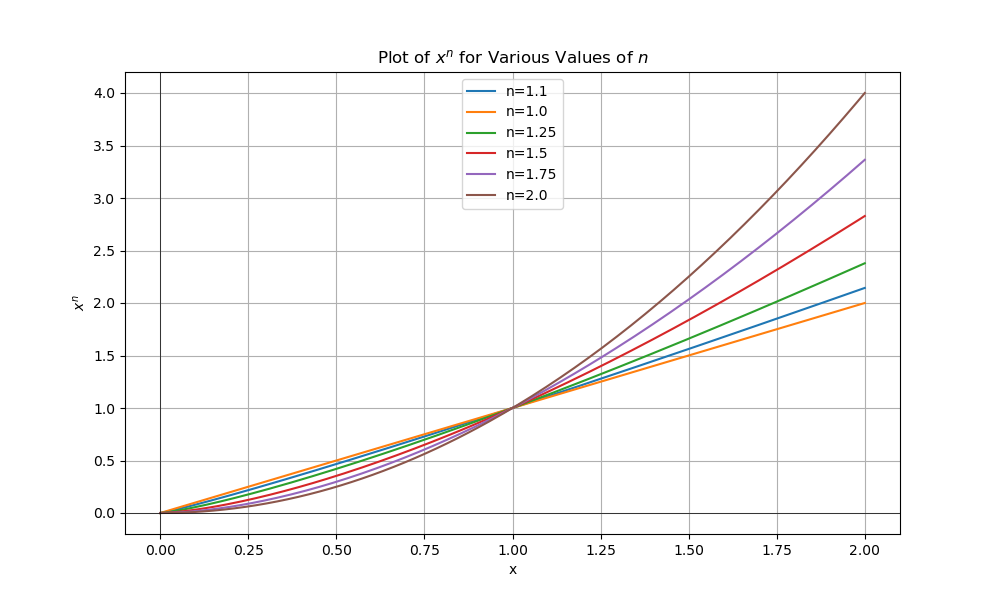

: 

In [220]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(0, 2, 200)  # Adjust the range as needed

# Plotting x^n for each n
plt.figure(figsize=(10, 6))
for n in [1.1] + list(np.linspace(1, 2, 5)):
    y = np.power(x, n)
    plt.plot(x, y, label=f'n={n}')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Plot of $x^n$ for Various Values of $n$')
plt.xlabel('x')
plt.ylabel('$x^n$')
plt.legend()
plt.grid(True)
plt.show()